In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

In [2]:
train = pd.read_csv("C:/Users/oekpom/Desktop/Datasets/Machine Learning/Lesson 4/bigmart_train.csv")

In [3]:
train.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [4]:
train.shape

(8523, 12)

In [6]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
train["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [8]:
train["Outlet_Establishment_Year"].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [9]:
train["Outlet_Age"] = 2020 - train["Outlet_Establishment_Year"]

In [10]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,21
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,11
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,21
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,22
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,33


In [11]:
train["Outlet_Size"].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [12]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Age
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914,22.168133
std,4.643456,0.051598,62.275067,8.371760,1706.499616,8.371760
min,4.555000,0.000000,31.290000,1985.000000,33.290000,11.000000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400,16.000000
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000,21.000000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400,33.000000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800,35.000000


In [14]:
train["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [17]:
train["Outlet_Size"].mode()[0]

'Medium'

In [18]:
train["Outlet_Size"] = train["Outlet_Size"].fillna(train["Outlet_Size"].mode()[0])

In [19]:
train["Item_Weight"] = train["Item_Weight"].fillna(train["Item_Weight"].mean())

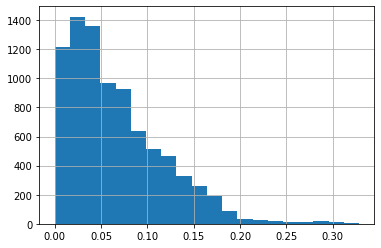

In [22]:
train["Item_Visibility"].hist(bins=20)

In [25]:
Q1 = train["Item_Visibility"].quantile(0.25)
Q3 = train["Item_Visibility"].quantile(0.75)
IQR = Q3 - Q1
filt_train = train.query('(@Q1 - 1.5*@IQR) <= Item_Visibility <= (@Q3 + 1.5*@IQR)')

In [26]:
filt_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,21
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,11
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,21
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,22
4,NCD19,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,33
5,FDP36,10.395000,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,11
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,33
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,35
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Medium,Tier 2,Supermarket Type1,1076.5986,18
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Medium,Tier 2,Supermarket Type1,4710.5350,13


In [27]:
filt_train.shape, train.shape

((8379, 13), (8523, 13))

In [28]:
train = filt_train
train.shape

(8379, 13)

In [29]:
train["Item_Visibility_bins"] = pd.cut(train["Item_Visibility"], [0.000, 0.065, 0.13, 0.2], labels = ["Low Viz", "Viz", "High Viz"])

C:\Users\oekpom\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [30]:
train["Item_Visibility_bins"].value_counts()

Low Viz     4403
Viz         2557
High Viz     893
Name: Item_Visibility_bins, dtype: int64

In [31]:
train["Item_Visibility_bins"] = train["Item_Visibility_bins"].replace(np.nan, 'Low Viz', regex=True)

C:\Users\oekpom\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [37]:
train["Item_Fat_Content"] = train["Item_Fat_Content"].replace(["Low fat","LF","low fat"], "Low Fat")

C:\Users\oekpom\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [38]:
train["Item_Fat_Content"] = train["Item_Fat_Content"].replace('reg', "Regular")

C:\Users\oekpom\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [39]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,Item_Visibility_bins
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,21,Low Viz
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,11,Low Viz
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,21,Low Viz
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,22,Low Viz
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,33,Low Viz


In [40]:
le = LabelEncoder()

In [41]:
train["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [42]:
train["Item_Fat_Content"] = le.fit_transform(train["Item_Fat_Content"])

C:\Users\oekpom\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [43]:
train["Item_Visibility_bins"] = le.fit_transform(train["Item_Visibility_bins"])

C:\Users\oekpom\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [44]:
train["Outlet_Size"] = le.fit_transform(train["Outlet_Size"])

C:\Users\oekpom\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [45]:
train["Outlet_Location_Type"] = le.fit_transform(train["Outlet_Location_Type"])

C:\Users\oekpom\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [46]:
dummy = pd.get_dummies(train["Outlet_Type"])

In [47]:
dummy.head()

,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0


In [48]:
train = pd.concat([train,dummy], axis=1)

In [49]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                   object
Item_Outlet_Sales            float64
Outlet_Age                     int64
Item_Visibility_bins           int32
Grocery Store                  uint8
Supermarket Type1              uint8
Supermarket Type2              uint8
Supermarket Type3              uint8
dtype: object

In [50]:
train = train.drop(["Item_Identifier", "Item_Type", "Outlet_Identifier", "Outlet_Type", "Outlet_Establishment_Year"], axis=1)

In [51]:
train.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Size', 'Outlet_Location_Type', 'Item_Outlet_Sales',
       'Outlet_Age', 'Item_Visibility_bins', 'Grocery Store',
       'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3'],
      dtype='object')

In [52]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlet_Age,Item_Visibility_bins,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,9.30,0,0.016047,249.8092,1,0,3735.1380,21,1,0,1,0,0
1,5.92,1,0.019278,48.2692,1,2,443.4228,11,1,0,0,1,0
2,17.50,0,0.016760,141.6180,1,0,2097.2700,21,1,0,1,0,0
3,19.20,1,0.000000,182.0950,1,2,732.3800,22,1,1,0,0,0
4,8.93,0,0.000000,53.8614,0,2,994.7052,33,1,0,1,0,0


In [53]:
x = train.drop('Item_Outlet_Sales', axis=1)
y = train.Item_Outlet_Sales

In [72]:
test = pd.read_csv("C:/Users/oekpom/Desktop/Datasets/Machine Learning/Lesson 4/bigmart_test.csv")
test["Outlet_Size"] = test["Outlet_Size"].fillna("Medium")

In [73]:
test["Item_Visibility_bins"] = pd.cut(test["Item_Visibility"], [0.000, 0.065, 0.13, 0.2], labels = ["Low Viz", "Viz", "High Viz"])

In [74]:
test["Item_Weight"] = test["Item_Weight"].fillna(test["Item_Weight"].mean())

In [75]:
test["Item_Visibility_bins"] = test["Item_Visibility_bins"].fillna("Low Viz")

In [76]:
test["Item_Visibility_bins"].head()

0    Low Viz
1    Low Viz
2        Viz
3    Low Viz
4        Viz
Name: Item_Visibility_bins, dtype: category
Categories (3, object): [Low Viz < Viz < High Viz]

In [77]:
test["Item_Fat_Content"].unique()

array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

In [78]:
test["Item_Fat_Content"] = test["Item_Fat_Content"].replace(["Low fat","LF","low fat"], "Low Fat")

In [79]:
test["Item_Fat_Content"] = test["Item_Fat_Content"].replace('reg', "Regular")

In [80]:
test["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [81]:
test["Item_Fat_Content"] = le.fit_transform(test["Item_Fat_Content"])

In [82]:
test["Item_Visibility_bins"] = le.fit_transform(test["Item_Visibility_bins"])

In [83]:
test["Outlet_Size"] = le.fit_transform(test["Outlet_Size"])

In [84]:
test["Outlet_Location_Type"] = le.fit_transform(test["Outlet_Location_Type"])

In [85]:
test["Outlet_Age"] = 2020 - test["Outlet_Establishment_Year"]

In [86]:
test.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                   object
Item_Visibility_bins           int32
Outlet_Age                     int64
dtype: object

In [87]:
dummy = pd.get_dummies(test["Outlet_Type"])
test = pd.concat([test,dummy], axis=1)

In [88]:
x_test = test.drop(["Item_Identifier", "Item_Type", "Outlet_Identifier", "Outlet_Type", "Outlet_Establishment_Year"], axis=1)

In [89]:
x.columns, x_test.columns

(Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
        'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Age',
        'Item_Visibility_bins', 'Grocery Store', 'Supermarket Type1',
        'Supermarket Type2', 'Supermarket Type3'],
       dtype='object'),
 Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
        'Outlet_Size', 'Outlet_Location_Type', 'Item_Visibility_bins',
        'Outlet_Age', 'Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
        'Supermarket Type3'],
       dtype='object'))

In [91]:
from sklearn import model_selection
x_train, x_test, y_train, y_test = model_selection.train_test_split(x,y,test_size=0.3, random_state=42)

In [92]:
lin = LinearRegression()

In [93]:
lin.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [94]:
print(lin.coef_)
lin.intercept_

[    3.32565903    27.49948402  -196.15278716    15.96531149
    16.76148752     8.04121542    -2.28120926    17.62300318
 -1753.70556394   219.18652367  -122.33893469  1656.85797495]


-188.97447140613485

In [95]:
predictions = lin.predict(x_test)
print('MSE value is also %.2f'%sqrt(mean_squared_error(y_test,predictions)))

MSE value is also 1118.42


In [96]:
from sklearn.linear_model import Ridge
ridgereg = Ridge(alpha=0.001, normalize = True)
ridgereg.fit(x_train, y_train)
print('MSE value is also %.2f'%sqrt(mean_squared_error(y_train,ridgereg.predict(x_train))))
print('MSE value is also %.2f'%sqrt(mean_squared_error(y_test,ridgereg.predict(x_test))))
print("R2 value/Coefficient of determination: {}".format(ridgereg.score(x_test,y_test)))

MSE value is also 1139.53
MSE value is also 1118.36
R2 value/Coefficient of determination: 0.548659756640925


In [97]:
from sklearn.linear_model import Lasso
lassoreg = Lasso(alpha=0.001, normalize = True)
lassoreg.fit(x_train, y_train)
print('MSE value is also %.2f'%sqrt(mean_squared_error(y_train,lassoreg.predict(x_train))))
print('MSE value is also %.2f'%sqrt(mean_squared_error(y_test,lassoreg.predict(x_test))))
print("R2 value/Coefficient of determination: {}".format(lassoreg.score(x_test,y_test)))

MSE value is also 1139.53
MSE value is also 1118.41
R2 value/Coefficient of determination: 0.5486192642328969


In [98]:
from sklearn.linear_model import ElasticNet
Elas = ElasticNet(alpha=0.001, normalize = True)
Elas.fit(x_train, y_train)
print('MSE value is also %.2f'%sqrt(mean_squared_error(y_train,Elas.predict(x_train))))
print('MSE value is also %.2f'%sqrt(mean_squared_error(y_test,Elas.predict(x_test))))
print("R2 value/Coefficient of determination: {}".format(Elas.score(x_test,y_test)))

MSE value is also 1477.92
MSE value is also 1429.15
R2 value/Coefficient of determination: 0.2629524867556169
